
1. apply a function to dataframes
1. vary dataframe size
1. measure the scaling various methods

import python modules used in this notebook

In [1]:
import pandas
import numpy
import pickle
import matplotlib.pyplot as plt
import time

## before explaining how to measure scaling, start by showing the outcome

create a function that doubles the value of column 'A'

In [2]:
def double_col_a(row):
    """
    input: the row of a dataframe
    task: double the value in column A
    this function is fragile since it assumes a bunch of aspects
    """
    row_as_dict=dict(row)
    return row_as_dict['A']*2

To measure how well this scales, run 5 tests for a dataframe with 100 rows, then run 5 tests for a dataframe with 1000 rows, and finally run 5 tests for a dataframe with 10,000 rows.

In [3]:
number_of_tests=5 # how many experiments to run per size
list_of_row_size=[100, 1000, 10000]

These nested loops implement the scaling experiment

In [4]:
serial_reslts={}
scaling_start=time.time()
for row_count in list_of_row_size:
    test_reslts=[]
    for test_indx in range(number_of_tests): # run the same experiment multiple times 
        # create a dataframe with random content of a specified size
        # this isn't the section relevant to the scaling measurement, so timing isn't performed
        df = pandas.DataFrame(
                numpy.random.randint(0,1000,
                                     size=(row_count, 4)), 
                                     columns=list('ABCD'))
        # wrap the line of the code we are measuring with timing 
        start_time = time.time()
        df['K'] = df.apply(double_col_a,axis=1)
        test_reslts.append(time.time() - start_time) # store elapsed time to a list

    # after running the experiment multiple times, record the average result to a dictionary
    serial_reslts[row_count]=sum(test_reslts)/number_of_tests
    
    # progress indicator as we scale up
    print('elapsed time:',round(time.time() - scaling_start,2),'for',row_count)

elapsed time: 0.13 for 100
elapsed time: 1.09 for 1000
elapsed time: 9.82 for 10000


The results from the experiment are stored in a dictionary. I've already averaged the measurements from the 10 runs.

In [5]:
serial_reslts

{100: 0.02509918212890625,
 1000: 0.18968257904052735,
 10000: 1.7444572448730469}

Plot the data to see linear scaling. I've included a linear fit of the data points.

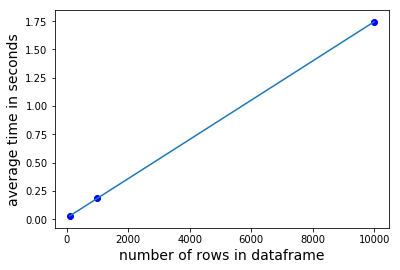

In [6]:
serial_x = list(serial_reslts.keys()) # list_of_row_size
serial_y = list(serial_reslts.values())
_=plt.scatter(serial_x,serial_y,color='blue')
_=plt.ylabel('average time in seconds',fontsize=14)
_=plt.xlabel('number of rows in dataframe',fontsize=14)

_=plt.plot(numpy.unique(serial_x), numpy.poly1d(numpy.polyfit(serial_x, serial_y, 1))(numpy.unique(serial_x))) # https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python

# Now I show how I created that code through iterative development

The `time.time()` command show what time it is in seconds since 12:00 am on January 1, 1970. This specific time is called "epoch." For more on that, see 

https://en.wikipedia.org/wiki/Epoch_(reference_date)#Computing

https://en.wikipedia.org/wiki/Unix_time

https://stackoverflow.com/questions/2533563/why-are-dates-calculated-from-january-1st-1970/2533567

In [7]:
time.time()

1587499619.1759033

Let's create fake data

In [8]:
numpy.random.randint(0,1000)

65

actually I need a table of fake data

In [42]:
numpy.random.randint(0,1000,size=(10, 4))

array([[789, 182, 754, 588],
       [779, 975, 603, 165],
       [796, 526, 265, 243],
       [421, 515, 367, 826],
       [509, 491,  28, 905],
       [568, 499, 771, 149],
       [460, 622, 104, 385],
       [776, 685, 562,  92],
       [775, 349, 461,  21],
       [239, 668, 593, 266]])

That almost looks like a dataframe

create a dataframe with randomly populated integers

In [43]:
start_time=time.time()
row_count=10000
df = pandas.DataFrame(numpy.random.randint(0,1000,
                                           size=(row_count, 4)), 
                                           columns=list('ABCD'))
print('cell elapsed:',round(time.time()-start_time,5),'seconds')

cell elapsed: 0.00234 seconds


In [44]:
df.shape

(10000, 4)

In [45]:
df.head()

,A,B,C,D
0,779,544,69,109
1,77,117,845,385
2,871,387,541,527
3,216,366,131,91
4,300,536,964,766


Given a dataframe with numeric values, I create a simple function that can operate on the rows

In [46]:
def double_col_a(row):
    row_as_dict=dict(row)
    return row_as_dict['A']*2

To use the function, 

In [47]:
df['K'] = df.apply(double_col_a,axis=1)

The shape of the dataframe should be different because a new colum was added

In [48]:
df.shape

(10000, 5)

In [49]:
df.head()

,A,B,C,D,K
0,779,544,69,109,1558
1,77,117,845,385,154
2,871,387,541,527,1742
3,216,366,131,91,432
4,300,536,964,766,600


In order to know how the function scales as the number of rows increases, I want to time that operation

<BR>
<BR>

To show the timing, I'll first reset the dataframe

In [50]:
df = pandas.DataFrame(numpy.random.randint(0,1000,
                                           size=(row_count, 4)), 
                                           columns=list('ABCD'))

In [51]:
start_time = time.time()
df['K'] = df.apply(double_col_a,axis=1)
print(round(time.time() - start_time,5),'seconds')

1.89216 seconds


Yay, a data point. Now we want to re-run that same test multiple times. 

Doing a task repeatedly means using a loop

In [52]:
number_of_tests=5
for test_indx in range(number_of_tests):
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    print(round(time.time() - start_time,5),'seconds')

2.29913 seconds
2.29626 seconds
1.95835 seconds
2.1152 seconds
1.96531 seconds


To ensure a fair test, reset the dataframe being used in every experiment

In [53]:
number_of_tests=5
for test_indx in range(number_of_tests):
    df = pandas.DataFrame(numpy.random.randint(0,1000,
                                               size=(row_count, 4)), 
                                               columns=list('ABCD'))
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    print(round(time.time() - start_time,5),'seconds')

2.14755 seconds
2.00019 seconds
1.7461 seconds
1.77322 seconds
1.8458 seconds


Rather than print the results of each test to screen, save to a list

In [54]:
number_of_tests=5
test_reslts=[]
for test_indx in range(number_of_tests):
    df = pandas.DataFrame(numpy.random.randint(0,1000,
                                               size=(row_count, 4)), 
                                               columns=list('ABCD'))
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    test_reslts.append(time.time() - start_time)

In [55]:
print(test_reslts)

[2.130800485610962, 1.7352862358093262, 1.9127428531646729, 1.9823122024536133, 1.919968605041504]


Rather than caring about each outcome, I want to know the average outcome

In [56]:
serial_reslts=sum(test_reslts)/number_of_tests

In [57]:
print(serial_reslts,'seconds')

1.9362220764160156 seconds


Put the calculation of the average at the end of the loop

In [58]:
number_of_tests=5
test_reslts=[]
for test_indx in range(number_of_tests):
    df = pandas.DataFrame(numpy.random.randint(0,1000,
                                               size=(row_count, 4)), 
                                               columns=list('ABCD'))
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    test_reslts.append(time.time() - start_time)
    
# after running the experiment multiple times, record the average result to a dictionary
serial_reslts=sum(test_reslts)/number_of_tests

In [26]:
print(serial_reslts,'seconds')

2.0779483795166014 seconds


That was 5 tests of the timing for a dataframe where row_count=10000

In order to determine how the `double_col_a` function scales, we need to alter how many rows are in the dataframe

In [27]:
number_of_tests=5
list_of_row_size=[100, 1000, 10000]

Create a loop that runs tests for each of these row counts

Rather than store the test results to a scalar, store to a dictionary. The dictionary key is the number of rows in the dataframe.

In [28]:
serial_reslts={}
for row_count in list_of_row_size:
    test_reslts=[]
    for test_indx in range(number_of_tests):
        df = pandas.DataFrame(
                numpy.random.randint(0,1000,
                                     size=(row_count, 4)), 
                                     columns=list('ABCD'))
        start_time = time.time()
        df['K'] = df.apply(double_col_a,axis=1)
        test_reslts.append(time.time() - start_time)
        
    # after running the experiment multiple times, record the average result to a dictionary
    serial_reslts[row_count]=sum(test_reslts)/number_of_tests

In [29]:
print(serial_reslts)

{100: 0.02699589729309082, 1000: 0.19627823829650878, 10000: 1.9523737907409668}


Now we can plot

Text(0.5,1,'timing a function call')

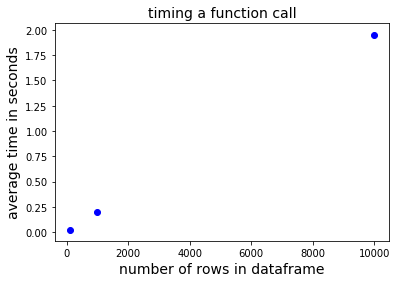

In [30]:
serial_x = list(serial_reslts.keys()) 
serial_y = list(serial_reslts.values())
_=plt.scatter(serial_x,serial_y,color='blue')
_=plt.ylabel('average time in seconds',fontsize=14)
_=plt.xlabel('number of rows in dataframe',fontsize=14)
plt.title('timing a function call',fontsize=14)

And to provide a guide for the reader's eye, add a linear fit

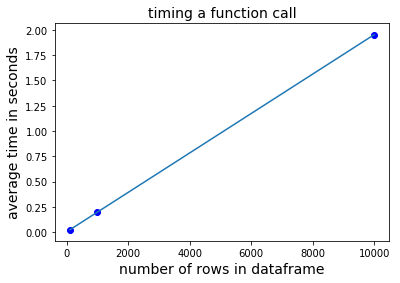

In [31]:
serial_x = list(serial_reslts.keys()) # list_of_row_size
serial_y = list(serial_reslts.values())
plt.scatter(serial_x,serial_y,color='blue')
plt.ylabel('average time in seconds',fontsize=14)
plt.xlabel('number of rows in dataframe',fontsize=14)
plt.title('timing a function call',fontsize=14)

plt.plot(numpy.unique(serial_x), numpy.poly1d(numpy.polyfit(serial_x, serial_y, 1))(numpy.unique(serial_x))); # https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python

# How to place the results in a dataframe

The timing output is currently a dictionary, but a table is desired.

First, check out https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html

Because of the way we've set up our dictionary, that method doesn't apply.

In [32]:
serial_reslts

{100: 0.02699589729309082,
 1000: 0.19627823829650878,
 10000: 1.9523737907409668}

The following works

https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe

In [33]:
pandas.DataFrame([serial_reslts])

,100,1000,10000
0,0.026996,0.196278,1.952374


and we could manipulate it into a better table, but I'm going to use a different method.

To review what we are starting with,

In [34]:
serial_reslts

{100: 0.02699589729309082,
 1000: 0.19627823829650878,
 10000: 1.9523737907409668}

That key-value design is not descriptive of the content. Compare that to

In [35]:
for k,v in serial_reslts.items():
    print('{size:',k,', time:',v,'}')

{size: 100 , time: 0.02699589729309082 }
{size: 1000 , time: 0.19627823829650878 }
{size: 10000 , time: 1.9523737907409668 }


That looks like what we want but it is not a variable -- it merely looks correct.

In [36]:
for k,v in serial_reslts.items():
    my_dict = {}
    my_dict['size'] = k
    my_dict['time'] = v
    print(my_dict)
#    print('{size:',k,', time:',v,'}')

{'size': 100, 'time': 0.02699589729309082}
{'size': 1000, 'time': 0.19627823829650878}
{'size': 10000, 'time': 1.9523737907409668}


The difference is that these are actual Python variables printed rather than strings that look like Python variables

More work is needed to get the content into a single variable

In [37]:
my_list=[]
for k,v in serial_reslts.items():
    my_dict = {}
    my_dict['size'] = k
    my_dict['time'] = v
    my_list.append(my_dict)

In [38]:
my_list

[{'size': 100, 'time': 0.02699589729309082},
 {'size': 1000, 'time': 0.19627823829650878},
 {'size': 10000, 'time': 1.9523737907409668}]

In [39]:
df = pandas.DataFrame(my_list)

In [40]:
df

,size,time
0,100,0.026996
1,1000,0.196278
2,10000,1.952374


Notice that the variable names are the colum headers, and each row is an independent observation

How could we alter this dataframe to be even more descriptive?